## EDA (Exploratory Data Analysis)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Steam Games

In [3]:
steam_games = pd.read_csv('../datasets/steam_games.csv')

In [4]:
steam_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27834 entries, 0 to 27833
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   genres                     27715 non-null  object 
 1   app_name                   27834 non-null  object 
 2   price                      27834 non-null  float64
 3   id                         27834 non-null  int64  
 4   developer                  27834 non-null  object 
 5   Accounting                 27834 non-null  int64  
 6   Action                     27834 non-null  int64  
 7   Adventure                  27834 non-null  int64  
 8   Animation &amp; Modeling   27834 non-null  int64  
 9   Audio Production           27834 non-null  int64  
 10  Casual                     27834 non-null  int64  
 11  Design &amp; Illustration  27834 non-null  int64  
 12  Early Access               27834 non-null  int64  
 13  Education                  27834 non-null  int

In [5]:
# 1) Los años van desde 1983 a 2021
# 2) 2014 aparece como el 25% del total de los años, lo que denota falta de información, más que nada en los años antiguos.

steam_games['Year'].describe()

count    27820.000000
mean      2014.853810
std          3.275912
min       1983.000000
25%       2014.000000
50%       2016.000000
75%       2017.000000
max       2021.000000
Name: Year, dtype: float64

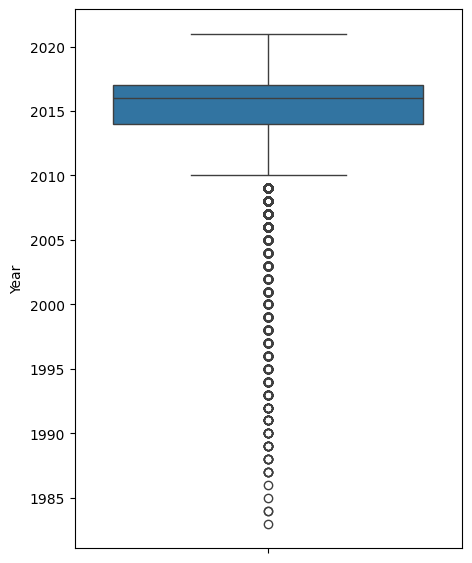

In [6]:
# Con el gráfico es más sencillo apreciar esto.

plt.figure(figsize=(5,7))
sns.boxplot(data=steam_games, y='Year')
plt.show()

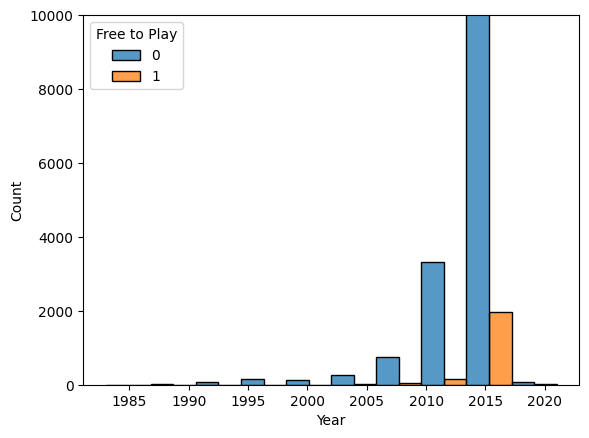

In [7]:
# El año con más juegos, mayormente los free to play, es 2015.
# El año con más juegos pagos es 2010.

sns.histplot(data=steam_games, x='Year', hue='Free to Play', bins=10, multiple='dodge')
plt.ylim(0,10000)
plt.show()

In [8]:
steam_games['price'].describe()

count    27834.000000
mean         8.947923
std         15.996668
min          0.000000
25%          2.990000
50%          4.990000
75%          9.990000
max        995.000000
Name: price, dtype: float64

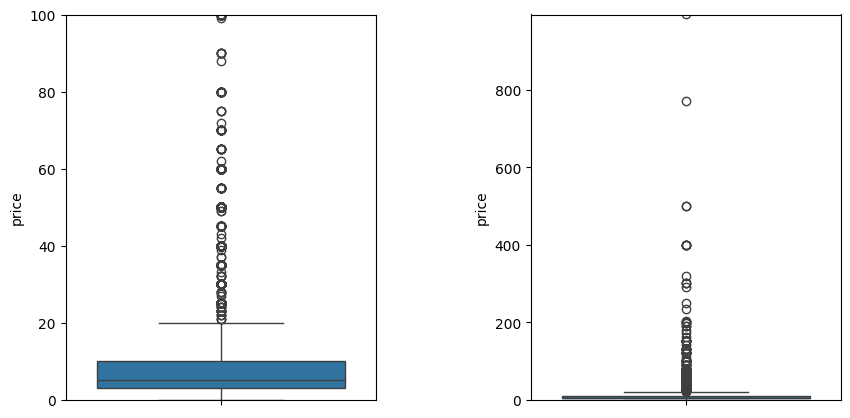

In [9]:
# En estos gráficos se pueden apreciar la cantidad de outliers que tiene la columna 'price'.
# Como los precios de los juegos pueden variar bastante no se van a considerar cómo errores, así que no se borraran.
fix, ax = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(data=steam_games, y='price', ax=ax[0])
sns.boxplot(data=steam_games, y='price', ax=ax[1])
ax[0].set_ylim(0,100)
ax[1].set_ylim(0,995)
plt.subplots_adjust(wspace= 0.5)
plt.show()

C:\Users\daant\AppData\Local\Temp\ipykernel_14004\2373578716.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=generos_cont.index, y=generos_cont.values, palette='viridis')


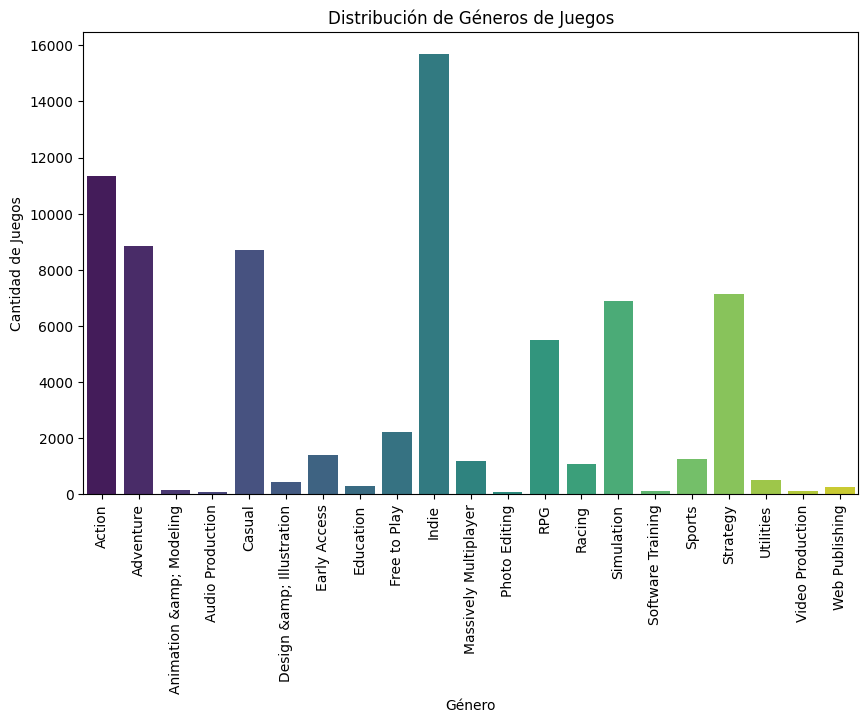

In [10]:
# Podemos ver que la mayor cantidad de juegos son del género 'Indie'.
generos = list(steam_games.drop(columns=['app_name','price','id','developer','Accounting','Year','genres']).columns)

generos_cont = steam_games[generos].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=generos_cont.index, y=generos_cont.values, palette='viridis')

# Configurar etiquetas y título
plt.xlabel('Género')
plt.ylabel('Cantidad de Juegos')
plt.title('Distribución de Géneros de Juegos')
plt.xticks(rotation=90)  
plt.show()

### User Items

In [11]:
user_items = pd.read_csv(f'../datasets/user_items_comp_csv.gz', compression='gzip') 

In [12]:
user_items.head()

,user_id,items_count,id,item_name,playtime_forever
0,76561197970982479,277,10,Counter-Strike,6.0
1,Gutzen,28,10,Counter-Strike,18.0
2,76561198092430936,27,10,Counter-Strike,1.0
3,henryle,240,10,Counter-Strike,5959.0
4,DeadPowerGamer,182,10,Counter-Strike,0.0


In [13]:
user_items['playtime_forever'].describe()

count    5.153209e+06
mean     9.914951e+02
std      5.418204e+03
min      0.000000e+00
25%      0.000000e+00
50%      3.400000e+01
75%      3.550000e+02
max      6.427730e+05
Name: playtime_forever, dtype: float64

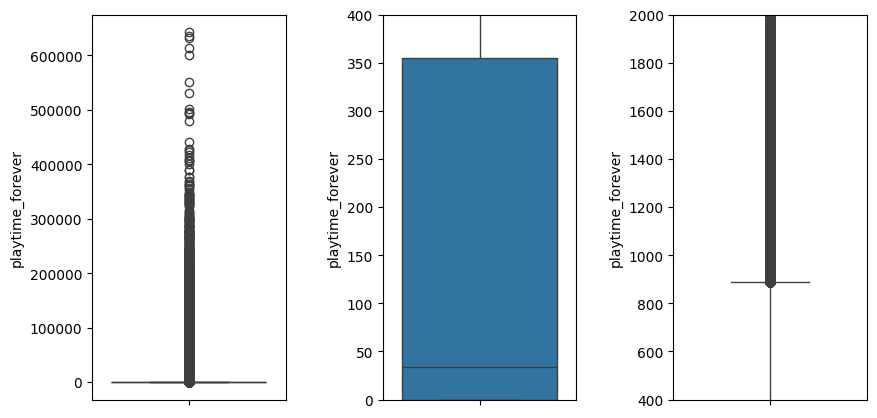

In [14]:
# En playtime Forever tenemos muchos elementos que se pueden considerar como Outliers.
# Pero no resulta raro que cada jugadores le dedique más o menos tiempo a cada juego, por lo que se dejarán cómo están.

fig, ax = plt.subplots(1,3,figsize=(10,5))
sns.boxplot(data=user_items, y='playtime_forever', ax=ax[0])
sns.boxplot(data=user_items, y='playtime_forever', ax=ax[1])
sns.boxplot(data=user_items, y='playtime_forever', ax=ax[2])
ax[1].set_ylim(0, 400)
ax[2].set_ylim(400,2000)
plt.subplots_adjust(wspace= 0.5)
plt.show()

In [15]:
# Me aseguro de que ambas columnas 'id' tengan el mismo tipo de datos (por ejemplo, int64).
steam_games['id'] = steam_games['id'].astype(int)
user_items['id'] = user_items['id'].astype(int)

# Realizo la fusión después de convertir ambas columnas 'id' a int64.
games_users = pd.merge(steam_games[['id', 'Year']], user_items[['id', 'playtime_forever']], on='id', how='inner')

In [16]:
playtime_poritem = user_items.groupby('id')['playtime_forever'].sum().div(60).reset_index()
playtime_poritem
games_playtime = pd.merge(steam_games,playtime_poritem,left_on='id',right_on='id',how='inner')
games_playtime.sample(5)

,genres,app_name,price,id,developer,Accounting,Action,Adventure,Animation &amp; Modeling,Audio Production,...,Racing,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing,Year,playtime_forever
2566,Action.Indie,AIPD - Artificial Intelligence Police Department,9.99,390930,Blazing Badger,0,1,0,0,0,...,0,0,0,0,0,0,0,0,2016.0,0.150000
8159,Action.Indie.RPG,Zombie Shooter 2,9.99,33180,Sigma Team Inc.,0,1,0,0,0,...,0,0,0,0,0,0,0,0,2009.0,292.650000
2546,Action.Adventure.Casual,Marcus Level,4.99,417480,3DDUO,0,1,1,0,0,...,0,0,0,0,0,0,0,0,2016.0,7.133333
3424,Action.Casual.Indie.Simulation,Maximum Override,6.99,389220,Alientrap,0,1,0,0,0,...,0,1,0,0,0,0,0,0,2017.0,59.300000
503,Action.Indie,The Haunted: Hells Reach,8.99,43190,KTX Software,0,1,0,0,0,...,0,0,0,0,0,0,0,0,2011.0,525.016667


In [17]:
# Voy a mostrar un gráfico con los juegos con más horas jugadas.

# Ordena el DataFrame 'games_playtime' en orden descendente por la columna 'playtime_forever'
games_playtime.sort_values(ascending=False,by='playtime_forever',inplace=True)

# Selecciona las primeras 15 filas después de ordenar y los almacena en 'best_hours15'
best_hours15 = games_playtime.head(15)

# Muestra las primeras 5 filas de 'best_hours15'
best_hours15.head(5)

,genres,app_name,price,id,developer,Accounting,Action,Adventure,Animation &amp; Modeling,Audio Production,...,Racing,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing,Year,playtime_forever
601,Action.Strategy,Counter-Strike: Global Offensive,14.99,730,Valve,0,1,0,0,0,...,0,0,0,0,1,0,0,0,2012.0,1.308640e+07
8,Indie.Simulation.Action.Adventure.Massively Mu...,Garry's Mod,9.99,4000,Facepunch Studios,0,1,1,0,0,...,0,1,0,0,0,0,0,0,2006.0,7.472777e+06
7990,Action.Adventure.Indie.RPG,Terraria,9.99,105600,Re-Logic,0,1,1,0,0,...,0,0,0,0,0,0,0,0,2011.0,2.582909e+06
7634,Action.Free to Play.Massively Multiplayer.RPG,Warframe,0.00,230410,Digital Extremes,0,1,0,0,0,...,0,0,0,0,0,0,0,0,2013.0,2.067128e+06
8507,Action.Strategy.Simulation,Counter-Strike: Source,19.99,240,Valve,0,1,0,0,0,...,0,1,0,0,1,0,0,0,2004.0,1.876867e+06


C:\Users\daant\AppData\Local\Temp\ipykernel_14004\339519455.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=best_hours15,y='app_name',x='playtime_forever',palette='pastel')


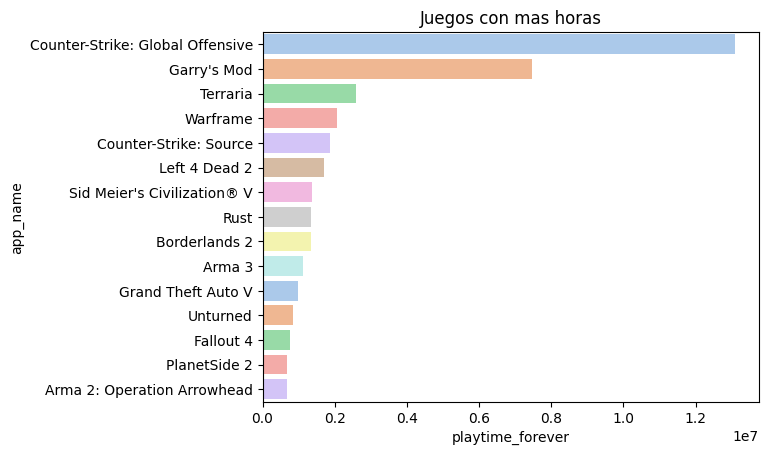

In [18]:
sns.barplot(data=best_hours15,y='app_name',x='playtime_forever',palette='pastel')
plt.title('Juegos con mas horas')
plt.show()

In [19]:
# Voy a agrupar por Developer

# Agrupar los datos por 'developer' y calcular la suma de 'playtime_forever'.
games_playtime_dev = games_playtime.groupby('developer')['playtime_forever'].sum().reset_index()

# Ordenar los datos en orden descendente por 'playtime_forever'.
games_playtime_dev.sort_values(ascending=False,by='playtime_forever',inplace=True)

# Seleccionar los 15 'developer' con más tiempo de juego acumulado.
best_games_playtime_dev = games_playtime_dev.head(15)

# Mostrar los primeros 5 'developer' con más tiempo de juego.
best_games_playtime_dev.head(5)

,developer,playtime_forever
5070,Valve,1.824512e+07
1671,Facepunch Studios,8.824784e+06
3843,Re-Logic,2.582909e+06
672,Bohemia Interactive,2.445825e+06
1334,Digital Extremes,2.079624e+06


C:\Users\daant\AppData\Local\Temp\ipykernel_14004\1247094229.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=best_games_playtime_dev,y='developer',x='playtime_forever',palette='pastel')


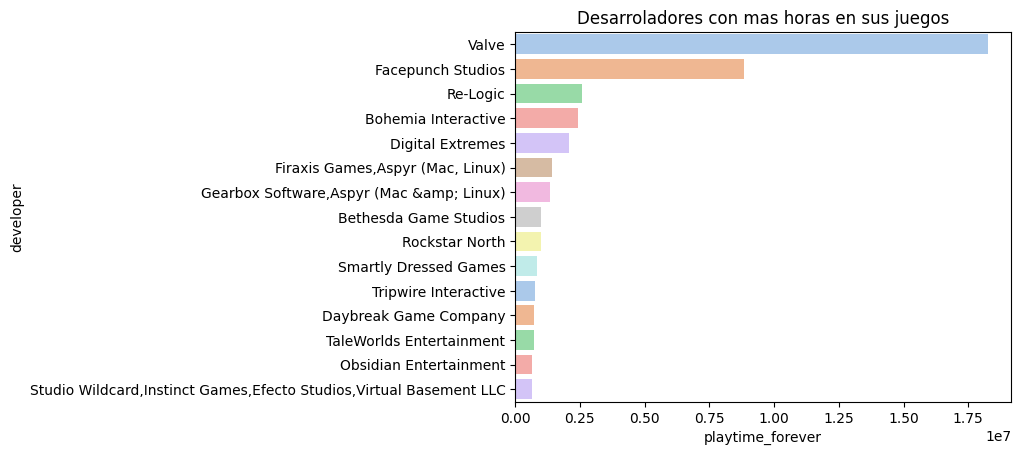

In [20]:
# Valve es el developer con más horas acumuladas de juego
sns.barplot(data=best_games_playtime_dev,y='developer',x='playtime_forever',palette='pastel')
plt.title('Desarroladores con mas horas en sus juegos')
plt.show()

### User Reviews

In [21]:
user_review = pd.read_csv('../datasets/user_reviews.csv')

In [22]:
user_review.sample(5)

,user_id,posted,item_id,recommend,sentiment_analysis,Año
13736,kantbigdick,"Posted July 16, 2014.",250760,True,2,2014
40319,smunktait,"Posted March 23, 2014.",51100,True,2,2014
14109,threashold,"Posted October 28, 2014.",304670,True,2,2014
27295,jangMVP,"Posted July 3, 2015.",440,True,1,2015
55179,xeoeon,"Posted December 30, 2013.",225080,True,2,2013


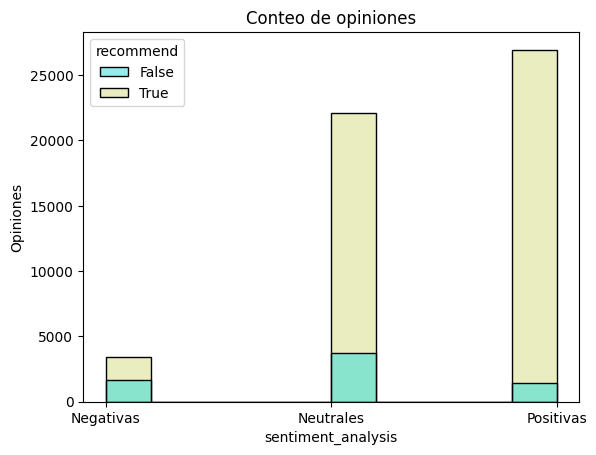

In [23]:
# Hay mayor procentaje de sentimientos positivos.

sns.histplot(data=user_review,x='sentiment_analysis',bins=10,palette='rainbow',hue='recommend')
plt.title('Conteo de opiniones')
plt.xticks(ticks=[0, 1, 2], labels=['Negativas', 'Neutrales', 'Positivas'])
plt.ylabel('Opiniones')
plt.show()

In [24]:
# Ahora voy a comparar a cada Developer según sus recomendaciones positivas.

# Agrupamos las reseñas de usuarios por 'item_id' y aplicamos una transformación de 'recommend'
user_review_cop = user_review
user_review_cop['recommend'] = user_review['recommend'].apply(lambda x:1 if x else -1) # Recomendaciones positivas suma y negativas resta
user_review_rec = user_review_cop.groupby('item_id')['recommend'].sum().reset_index()

# Unimos los dataframes 'steam_games' y 'user_review_rec' en la columna 'id' e 'item_id', respectivamente
games_recommend = pd.merge(steam_games,user_review_rec,left_on='id',right_on='item_id',how='inner')

# Agregamos las recomendaciones por desarrollador
games_recommend = games_recommend.groupby('developer')['recommend'].sum().reset_index()

# Ordenamos los valores en orden descendente para obtener los mejores recomendados
games_recommend.sort_values(ascending=False,by='recommend',inplace=True) # Obtengo las mejores recomendaciones

# Tomamos los primeros 15 resultados
games_recommend_best = games_recommend.head(15)

# Mostramos los primeros 5 resultados
games_recommend_best.head(5)

,developer,recommend
1936,Valve,8728
639,Facepunch Studios,2224
1628,Smartly Dressed Games,888
250,Bohemia Interactive,749
1433,Re-Logic,705


C:\Users\daant\AppData\Local\Temp\ipykernel_14004\3905215269.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=games_recommend_best,x='recommend',y='developer',palette='pastel')


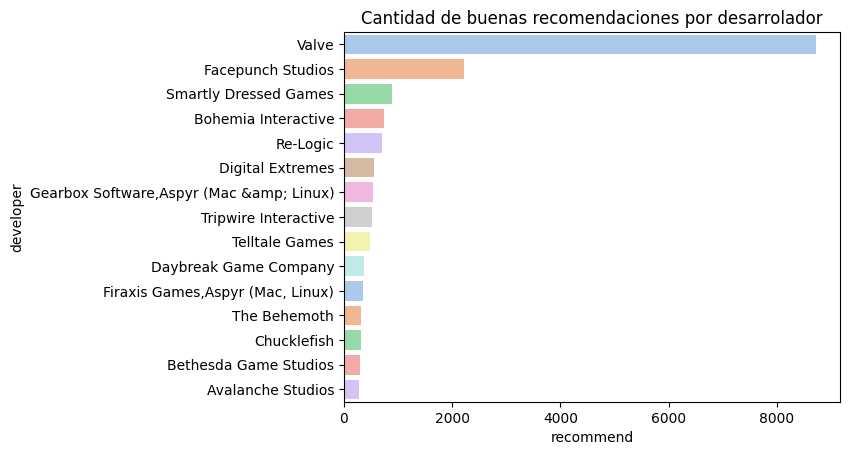

In [25]:
sns.barplot(data=games_recommend_best,x='recommend',y='developer',palette='pastel')
plt.title('Cantidad de buenas recomendaciones por desarrolador')
plt.show()